# Monte Carlo Simulation for Social Distancing to Prevent COVID-19 Infection

This notebook holds the analysis for the Monte Carlo Simulation.

In [29]:
# Dependencies

import pandas as pd
import numpy as np
import seaborn as sns

from grid import Grid

sns.set_style('whitegrid')


In [71]:
# Simulation setup

# Grid size
grid_height = 100
grid_width = 100

# Simulation parameters
population_size = 1000
infection_rate = 0.009
mobility = 0.75
p_death = 0.06
infection_duration = 4
max_evolutions = 1000

# Percentage of stationary population (per simulation)
stationary_percentages = np.arange(0, 1.2, 0.2).round(2).tolist()

# Simulation per stationary population
# TODO: Update this to 10000 for proper run
run_per_stat_percentage = 10


In [72]:
# Running simulation


# DataFrame creation

df = pd.DataFrame({
    "Stationary Percentage": [],
    "Death Rate": [],
    "Max Infection Rate": [],
    "Max Infection Rate Period": [],
    "Max Infected Count": [],
    "Max Infected Count Period": [],
    "Total Infection Rate": [],
    "Stop Period": []
})



for stat_percentage in stationary_percentages:
    
    death_rates = []
    
    max_infection_rates = []
    max_infection_rate_periods = []
    
    max_infected_counts = []
    max_infected_count_periods = []
    
    total_infection_rates = []
    
    stop_periods = []
    
    for i in range(run_per_stat_percentage):
        
        if (i+1)%10 == 0:
            print(f"runs performed: {i+1} for stat_percentage: {stat_percentage}")
            
        last_evolution = 0
        
        max_infection_rate = 0
        max_infection_rate_period = 0
        
        max_infected_count = 0
        max_infected_count_period = 0
        
        last_dead_person_count = 0
        last_immune_person_count = 0
        last_infected_person_count = 0
        
        g = Grid(grid_height, grid_width, population_size, infection_rate,
                 stat_percentage, mobility, p_death, infection_duration)
                        
        for evolution in range(max_evolutions):

            if g.is_outbreak_stable():
                last_evolution = evolution
                break

            g.perform_evolution()
            
            current_snapshot = g.get_current_snapshot()
            
            current_dead_person_count = current_snapshot["dead_person_count"]
            current_immune_person_count = current_snapshot["immune_person_count"]
            current_infected_person_count = current_snapshot["infected_person_count"]
            
            current_infection_rate = (current_infected_person_count - last_infected_person_count)
            current_infection_rate += (current_immune_person_count - last_immune_person_count)
            current_infection_rate += (current_dead_person_count - last_dead_person_count)
            
            if (current_infection_rate > max_infection_rate):
                max_infection_rate = current_infection_rate
                max_infection_rate_period = evolution
            
            if (current_infected_person_count > max_infected_count):
                max_infected_count = current_infected_person_count
                max_infected_count_period = evolution
            
            last_dead_person_count = current_dead_person_count
            last_immune_person_count = current_immune_person_count
            last_infected_person_count = current_infected_person_count

        
        final_snapshot = g.get_current_snapshot()
        
        final_dead_person_count = final_snapshot["dead_person_count"]
        final_immune_person_count = final_snapshot["immune_person_count"]
        final_infected_person_count = final_snapshot["infected_person_count"]
        
        total_infection_rate = final_dead_person_count + final_immune_person_count + final_infected_person_count
        
        death_rates.append(final_dead_person_count)

        max_infection_rates.append(max_infection_rate)
        max_infection_rate_periods.append(max_infection_rate_period + 1)
        
        max_infected_counts.append(max_infected_count)
        max_infected_count_periods.append(max_infected_count_period + 1)
        
        total_infection_rates.append(total_infection_rate)
        
        stop_periods.append(last_evolution + 1)
                
        
    new_df = pd.DataFrame({
        "Stationary Percentage": np.repeat(stat_percentage, run_per_stat_percentage),
        "Death Rate": death_rates,
        "Max Infection Rate": max_infection_rates,
        "Max Infection Rate Period": max_infection_rate_periods,
        "Max Infected Count": max_infected_counts,
        "Max Infected Count Period": max_infected_count_periods,
        "Total Infection Rate": total_infection_rates,
        "Stop Period": stop_periods
    })

    df = df.append(new_df, ignore_index=True)

In [73]:
# Store the dataframe

# To read this, run df = pd.read_pickle(file_name)
df.to_pickle("simulation_df.pkl")

display(df)

,Stationary Percentage,Death Rate,Max Infection Rate,Max Infection Rate Period,Max Infected Count,Max Infected Count Period,Total Infection Rate,Stop Period
0,0.0,0.0,10.0,1.0,6.0,1.0,12.0,14.0
1,0.0,0.0,11.0,1.0,8.0,1.0,14.0,10.0
2,0.0,0.0,11.0,1.0,5.0,1.0,15.0,11.0
3,0.0,1.0,9.0,1.0,4.0,1.0,9.0,9.0
4,0.0,1.0,9.0,1.0,6.0,1.0,19.0,22.0
5,0.0,1.0,9.0,1.0,4.0,1.0,12.0,15.0
6,0.0,3.0,9.0,1.0,5.0,2.0,22.0,28.0
7,0.0,0.0,10.0,1.0,5.0,1.0,11.0,8.0
8,0.0,0.0,10.0,1.0,5.0,29.0,22.0,48.0
9,0.0,1.0,10.0,1.0,4.0,1.0,12.0,12.0


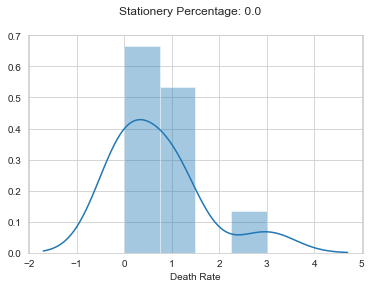

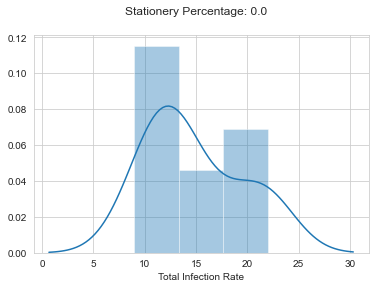

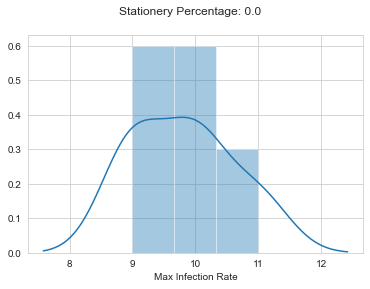

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


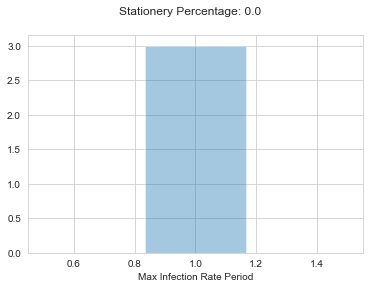

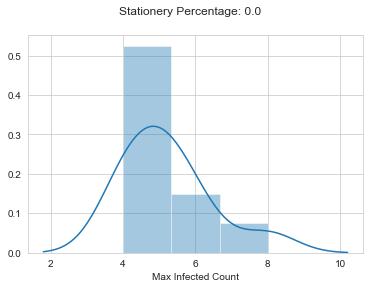

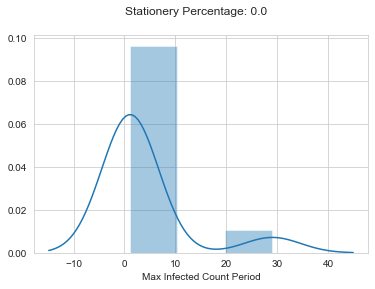

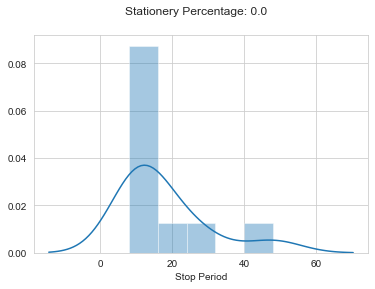

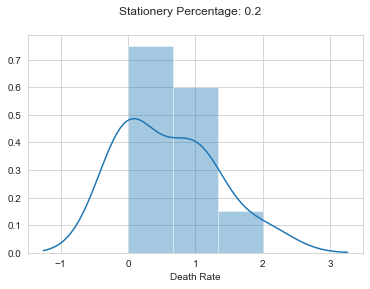

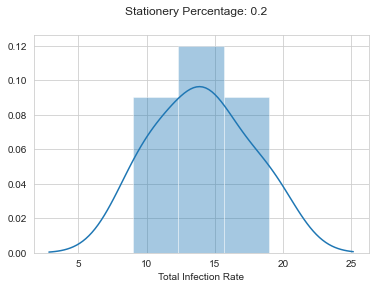

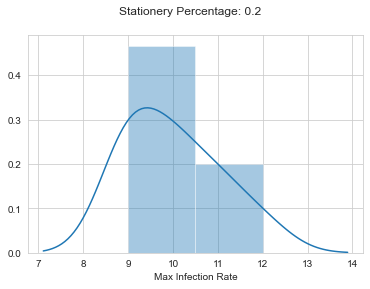

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


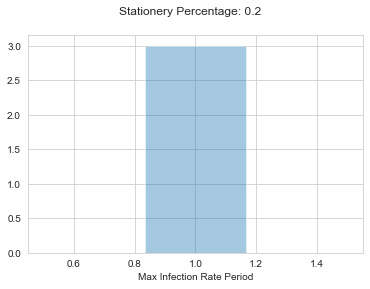

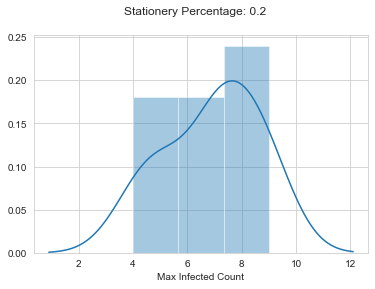

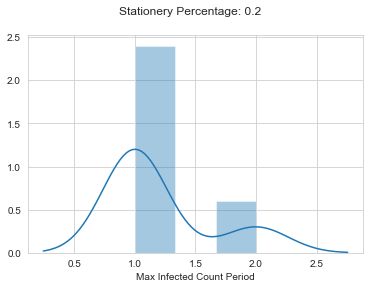

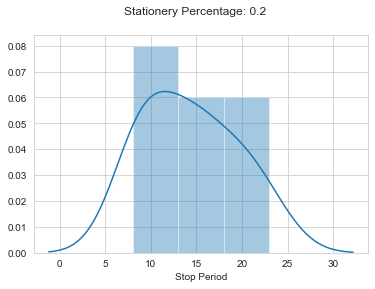

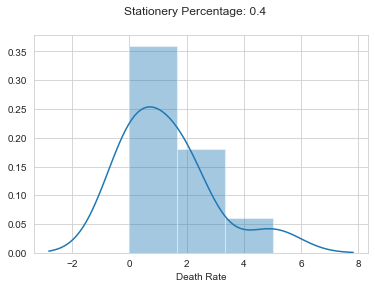

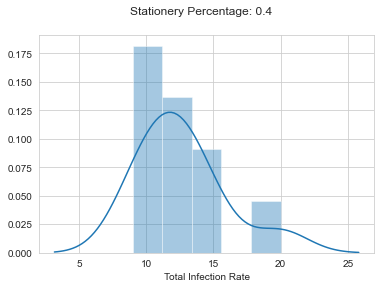

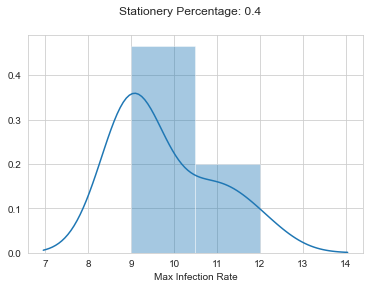

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


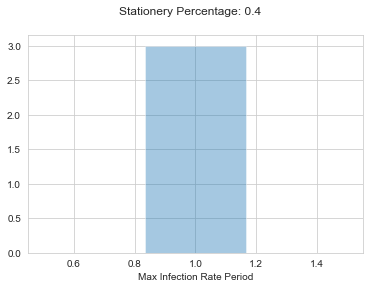

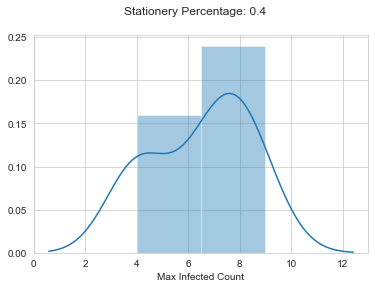

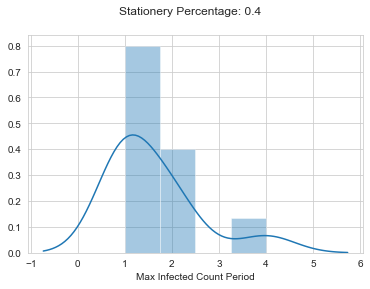

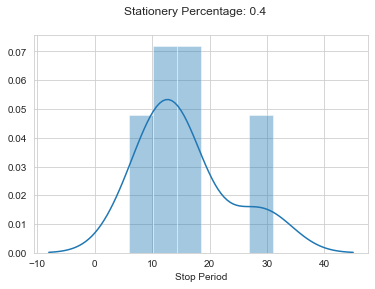

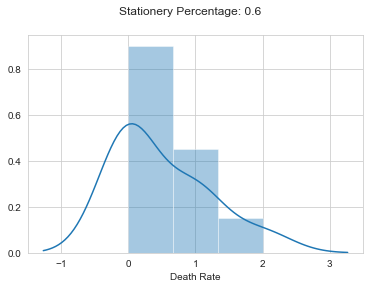

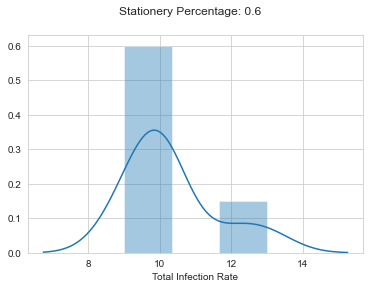

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


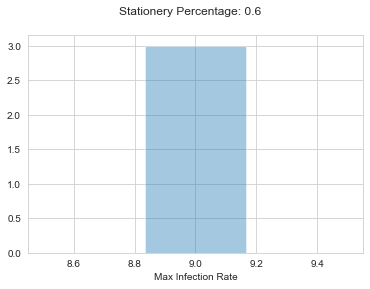

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


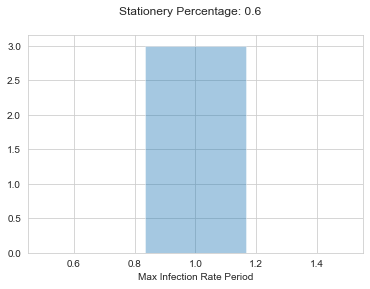

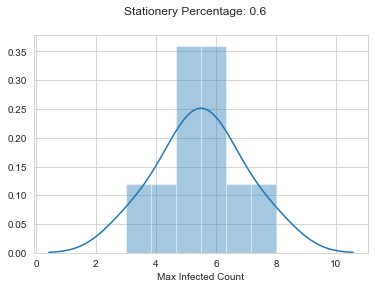

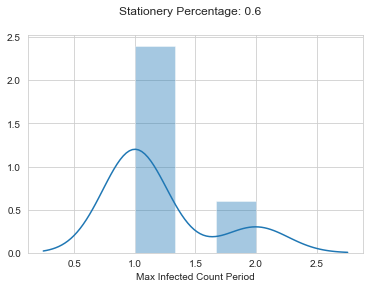

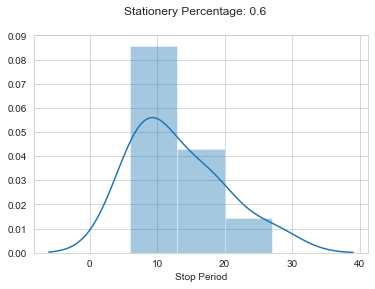

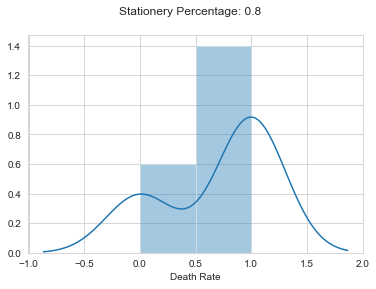

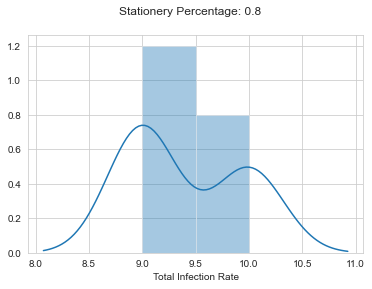

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


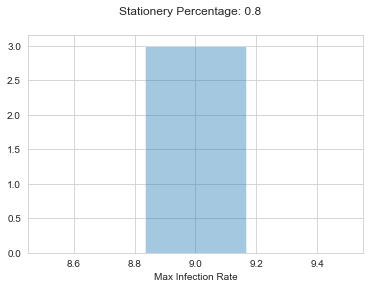

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


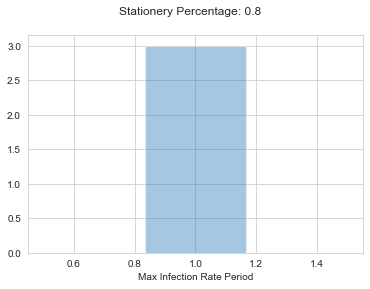

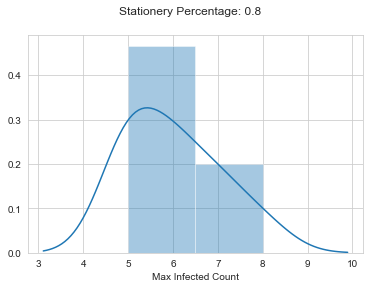

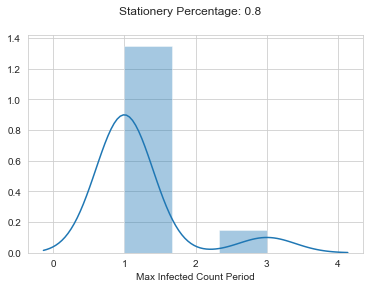

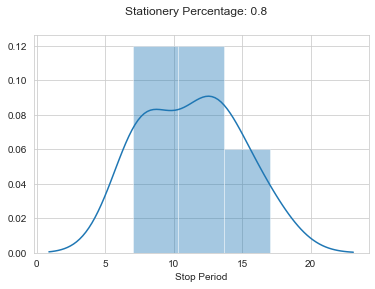

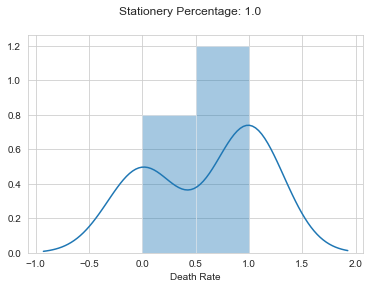

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


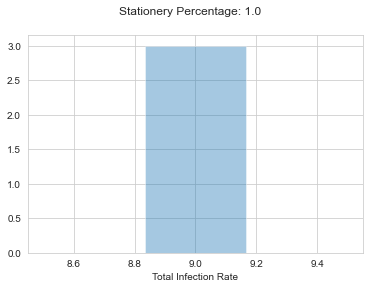

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


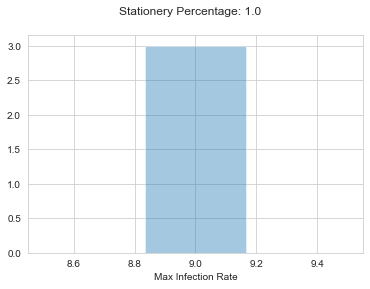

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


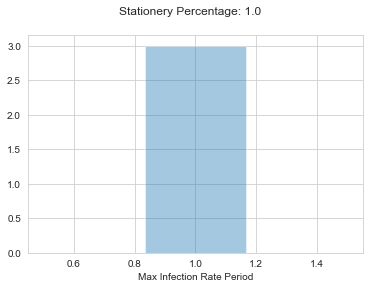

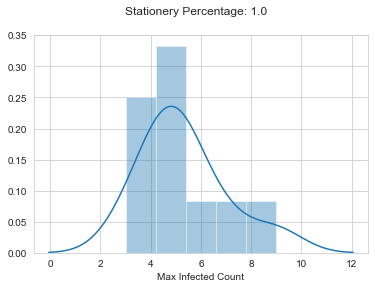

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


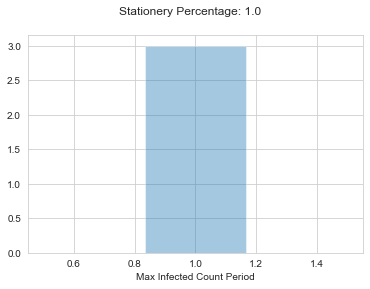

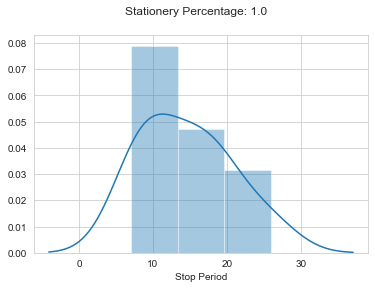

In [74]:
# Show histogram for the death rate, max infection rate, and total infection rate for each stationary percentage


import matplotlib.pyplot as plt

def show_histogram_plot(stat_percentage):
    
    stat_df = df.loc[df["Stationary Percentage"] == stat_percentage]
    
    show_category_histogram_plot(stat_percentage, stat_df, "Death Rate")
    show_category_histogram_plot(stat_percentage, stat_df, "Total Infection Rate")
    show_category_histogram_plot(stat_percentage, stat_df, "Max Infection Rate")
    show_category_histogram_plot(stat_percentage, stat_df, "Max Infection Rate Period")
    show_category_histogram_plot(stat_percentage, stat_df, "Max Infected Count")
    show_category_histogram_plot(stat_percentage, stat_df, "Max Infected Count Period")
    show_category_histogram_plot(stat_percentage, stat_df, "Stop Period")

    
def show_category_histogram_plot(stat_percentage, dataframe, category):
    
    sns.distplot(dataframe[category])
    plt.suptitle(f"Stationery Percentage: {stat_percentage}")
    plt.show()

    
for stat_percentage in stationary_percentages:
    
    show_histogram_plot(stat_percentage)
    

In [75]:
# Show graphs for each category against each stationary percentage

mean_df = df.groupby("Stationary Percentage").mean()

display(mean_df)

,Death Rate,Max Infection Rate,Max Infection Rate Period,Max Infected Count,Max Infected Count Period,Total Infection Rate,Stop Period
Stationary Percentage,,,,,,,
0.0,0.7,9.8,1.0,5.2,3.9,14.8,17.7
0.2,0.6,10.0,1.0,6.9,1.2,14.0,14.3
0.4,1.3,9.8,1.0,6.5,1.6,12.6,15.6
0.6,0.5,9.0,1.0,5.5,1.2,10.3,13.1
0.8,0.7,9.0,1.0,6.0,1.2,9.4,11.3
1.0,0.6,9.0,1.0,5.3,1.0,9.0,14.5


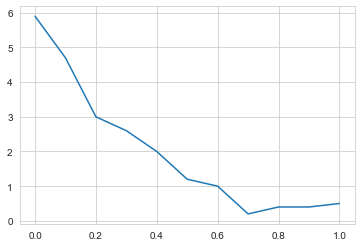

In [66]:
# Plot for Categories for each mean

def show_line_plot(dataframe, category):
    sns.lineplot(data=dataframe[category])
    plt.suptitle(f"{category}")
    plt.show()
    
categories = [
    "Death Rate", "Max Infection Rate", "Max Infection Rate Period",
    "Max Infected Count","Max Infected Count Period",
    "Total Infection Rate","Stop Period"
]

for category in categories:
    show_line_plot(mean_df, category)

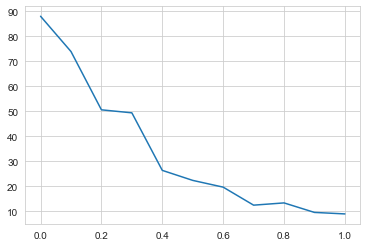

In [67]:
# Plot for Total Infection Rate

sns.lineplot(data=mean_df["Total Infection Rate"])

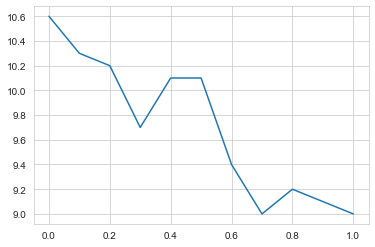

In [68]:
# Plot for Max Infection Rate
sns.lineplot(data=mean_df["Max Infection Rate"])

In [ ]:
# Plot for Max Infection Rate Period
sns.lineplot(data=mean_df["Max Infection Rate Period"])

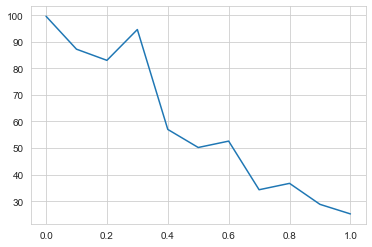

In [69]:
# Plot for Average Stop Period
sns.lineplot(data=mean_df["Stop Period"])